In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
Price_train= pd.read_excel(r"K:\Datatrained\Internship\Data_Train.xlsx")
Price_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [80]:
Price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [81]:
Price_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [82]:
Price_train.dropna(inplace=True)
Price_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [83]:
# here we will extract date and month from Date of Journey
#Day
Price_train["journey_Date"]= pd.to_datetime(Price_train['Date_of_Journey'], format= "%d/%m/%Y").dt.day

#month
Price_train["journey_Month"]= pd.to_datetime(Price_train['Date_of_Journey'], format= "%d/%m/%Y").dt.month

Price_train.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [84]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
Price_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [85]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Price_train['Dep_hour']=pd.to_datetime(Price_train['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
Price_train['Dep_min']=pd.to_datetime(Price_train['Dep_Time']).dt.minute

Price_train.drop(['Dep_Time'],axis=1,inplace=True)

In [86]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Price_train['Arrival_hour']=pd.to_datetime(Price_train['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
Price_train['Arrival_min']=pd.to_datetime(Price_train['Arrival_Time']).dt.minute

Price_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [87]:
Price_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [88]:
# Assigning and converting Duration column into list
duration = list(Price_train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2: 
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [89]:
Price_train["Duration_hours"] = duration_hours
Price_train["Duration_mins"] = duration_mins

#we will remove the DUrtaion clumns
Price_train.drop(['Duration'],axis=1,inplace=True)

In [90]:
Price_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [91]:
Price_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [92]:
Price_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [93]:
Airline = Price_train[["Airline"]]
Airline = pd.get_dummies(Price_train['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


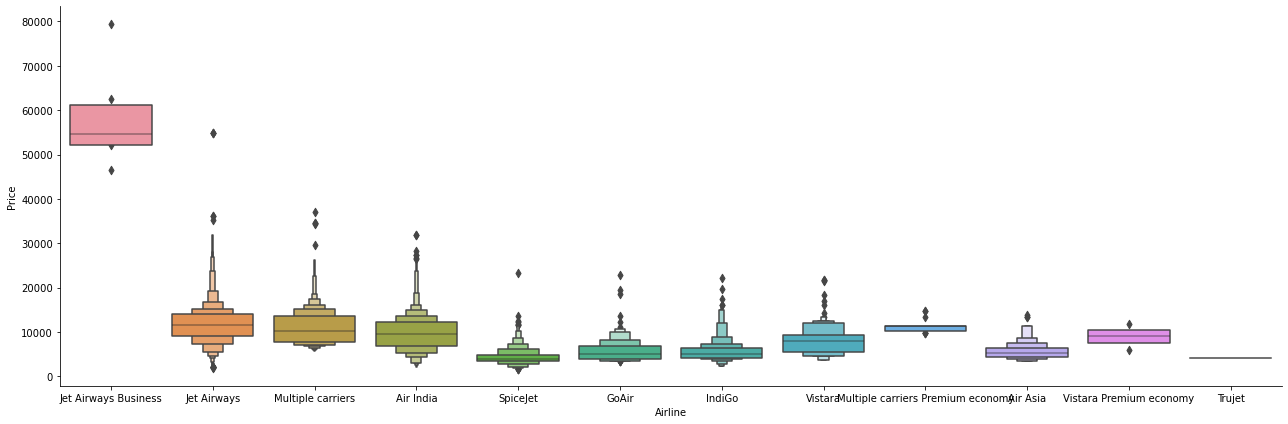

In [94]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = Price_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

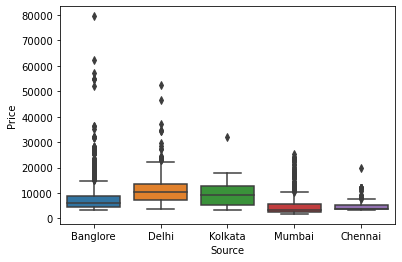

In [95]:
# Source vs Price

sns.boxplot(y = "Price", x = "Source", data = Price_train.sort_values("Price", ascending = False))
plt.show()

In [96]:
Source = Price_train[["Source"]]
Source = pd.get_dummies(Price_train['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [97]:
Destination = Price_train[["Destination"]]
Destination = pd.get_dummies(Price_train['Destination'], drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [98]:
Price_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [99]:
Price_train['Total_Stops'].value_counts()

Price_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
Price_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [100]:
New_Price_train=pd.concat([Price_train,Airline , Source, Destination],axis=1)

In [101]:
New_Price_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
New_Price_train.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [102]:
Test_Set= pd.read_excel(r"K:\Datatrained\Internship\Test_set.xlsx")
Test_Set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [103]:
Test_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [104]:
Test_Set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [105]:
# here we will extract date and month from Date of Journey
#day
Test_Set["journey_Date"]= pd.to_datetime(Test_Set['Date_of_Journey'], format= "%d/%m/%Y").dt.day

#month
Test_Set["journey_Month"]= pd.to_datetime(Test_Set['Date_of_Journey'], format= "%d/%m/%Y").dt.month

Test_Set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_Date,journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [106]:
Test_Set.drop(['Date_of_Journey'],axis=1,inplace=True)

In [107]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Test_Set['Dep_hour']=pd.to_datetime(Test_Set['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
Test_Set['Dep_min']=pd.to_datetime(Test_Set['Dep_Time']).dt.minute

Test_Set.drop(['Dep_Time'],axis=1,inplace=True)

In [108]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Test_Set['Arrival_hour']=pd.to_datetime(Test_Set['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
Test_Set['Arrival_min']=pd.to_datetime(Test_Set['Arrival_Time']).dt.minute

Test_Set.drop(['Arrival_Time'],axis=1,inplace=True)

In [109]:
# Assigning and converting Duration column into list
duration = list(Test_Set["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [110]:
print("Airline")
print("-"*75)
print(Test_Set["Airline"].value_counts())

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


In [111]:
Airline = pd.get_dummies(Test_Set["Airline"], drop_first= True)

In [112]:
print(Test_Set["Source"].value_counts())

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [113]:
Source = pd.get_dummies(Test_Set["Source"], drop_first= True)

In [114]:
print(Test_Set["Destination"].value_counts())

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [115]:
Destination = pd.get_dummies(Test_Set["Destination"], drop_first = True)

In [116]:
Test_Set.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [117]:
Test_Set.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [118]:
New_Test_Set = pd.concat([Test_Set, Airline, Source, Destination], axis = 1)

In [119]:
New_Test_Set.head()

,Airline,Source,Destination,Duration,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,10h 55m,1,6,6,17,30,4,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,4h,1,12,5,6,20,10,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,23h 45m,1,21,5,19,15,19,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,13h,1,21,5,8,0,21,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,2h 50m,0,24,6,23,55,2,...,0,0,0,0,0,0,1,0,0,0


In [120]:
New_Test_Set.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [121]:
print("Shape of test data : ", New_Test_Set.shape)

Shape of test data :  (2671, 27)


In [122]:
New_Test_Set.head()

,Duration,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,10h 55m,1,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,4h,1,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23h 45m,1,21,5,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,13h,1,21,5,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2h 50m,0,24,6,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0


In [123]:
y=New_Price_train['Price']

In [124]:
X= New_Price_train[['Total_Stops', 'journey_Date', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi']]
X.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,1,0,0,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,1,0,0,0,0,0,0,1,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

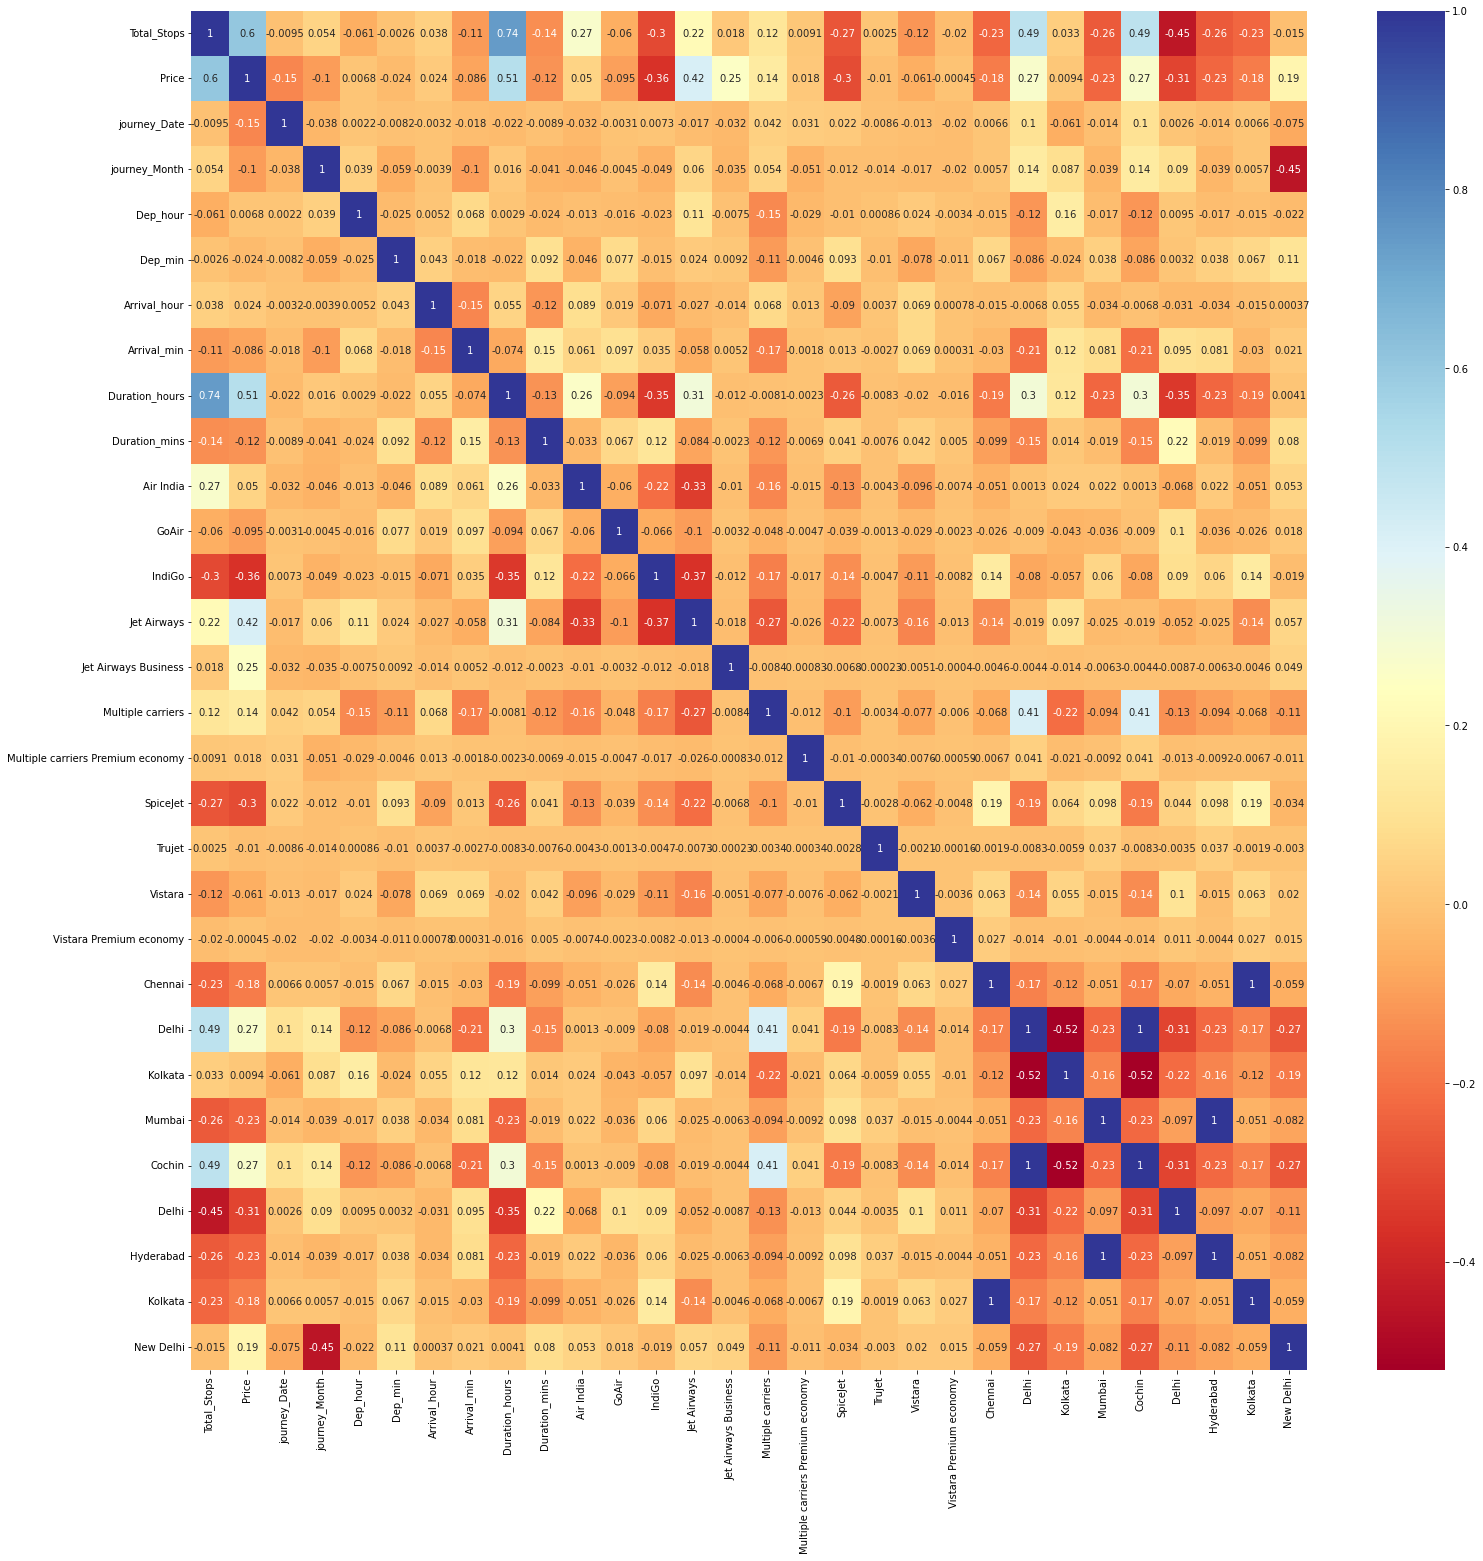

In [125]:
# Heatmap
plt.figure(figsize=(25,25))
sns.heatmap(New_Price_train.corr(),annot = True, cmap = "RdYlBu")

In [126]:
#Removing correlated features
Threshold=0.9

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

correlation(X,Threshold)

{'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'}

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X,y)
y_pred = tree_clf.predict(X)
print("Training Data Set Accuracy: ", accuracy_score(y,y_pred))
print("Training Data F Score ", f1_score(y,y_pred,pos_label='positive',average='micro'))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X,y,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X,y,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.854521625163827
Training Data F Score  0.854521625163827


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Validation Mean F1 Score:  0.19632789472996004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Validation Mean Accuracy:  0.38185571147904146


In [129]:
print("Training Data F Score ", f1_score(y,y_pred,pos_label='positive',average='micro'))

Training Data F Score  0.854521625163827


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [130]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X,y)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Test Accuracy:  0.09031352363125877
Test F1 Score:  0.09031352363125879


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [132]:
lr_model = LogisticRegression()
lr_model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
lr_trainscore = lr_model.score(X_train, y_train)
lr_testscore = lr_model.score(X_test, y_test)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy: ")
print("LR Train Accuracy: ",lr_trainscore*100)
print("LR Test Accuracy: ",lr_testscore*100)

Logistic Regression Accuracy: 
LR Train Accuracy:  23.55763604447045
LR Test Accuracy:  22.227421619092187


In [134]:
KNN = KNeighborsClassifier(n_neighbors=25)
KNN.fit(X_train, y_train)

KNN_trainscore = KNN.score(X_train, y_train)
KNN_testscore = KNN.score(X_test, y_test)
print("KNN Accuracy: ")
print("KNN Train Accuracy: ",KNN_trainscore*100)
print("KNN Test Accuracy: ",KNN_testscore*100)

KNN Accuracy: 
KNN Train Accuracy:  26.84610883557636
KNN Test Accuracy:  18.624239588207768


In [135]:
# Saving the best Model
import pickle
filename= 'Flight_Price_Prediction_model'
pickle.dump(tree_clf,open(filename,'wb'))

In [136]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X)

array([ 4804,  4804, 10262, ...,  7229,  4804,  4804], dtype=int64)